# Exploración de los datos

En la exploración de los datos observamos que la variable objetivo está codificada en cinco categorías correspondientes a diferentes etapas en el desarrollo de la enfermedad. Para nuestro interés, que es diferenciar casos patológicos de los no-patológicos, se agrupan todas las etapas de desarrollo en la enfermedad en una. Así las cosas el problema se convierte en uno de clasificación binaria.

https://archive.ics.uci.edu/ml/datasets/heart+disease

In [68]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from pandas_profiling import ProfileReport
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder
%matplotlib inline


In [5]:
df = pd.read_csv("Coronary_artery.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0


In [34]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
class         int64
dtype: object

In [6]:
df["class"].describe()

count    297.000000
mean       0.946128
std        1.234551
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        4.000000
Name: class, dtype: float64

In [7]:
df["class"].value_counts().to_frame()

,class
0,160
1,54
3,35
2,35
4,13


In [8]:
df["class"].replace([2,3,4],1,inplace=True)

In [9]:
df["class"].value_counts().to_frame()

,class
0,160
1,137


In [11]:
df[df.isin([np.NaN]).any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

In [13]:
for columna in list(df.columns):
    print(columna)
    print(np.sort(df[columna].unique()))

age
[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
sex
['Female' 'Male']
cp
['Asymptomatic' 'Atypical Angina' 'Nonanginal pain' 'Typical Angina']
trestbps
[ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 158 160 164 165 170 172 174 178 180 192 200]
chol
[126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 315 318 319 321 322 325 3

In [14]:
for columna in list(df.columns):
    print(df[columna].describe().to_frame())

              age
count  297.000000
mean    54.542088
std      9.049736
min     29.000000
25%     48.000000
50%     56.000000
75%     61.000000
max     77.000000
         sex
count    297
unique     2
top     Male
freq     201
                  cp
count            297
unique             4
top     Asymptomatic
freq             142
         trestbps
count  297.000000
mean   131.693603
std     17.762806
min     94.000000
25%    120.000000
50%    130.000000
75%    140.000000
max    200.000000
             chol
count  297.000000
mean   247.350168
std     51.997583
min    126.000000
25%    211.000000
50%    243.000000
75%    276.000000
max    564.000000
          fbs
count     297
unique      2
top     False
freq      254
       restecg
count      297
unique       3
top     Normal
freq       147
          thalach
count  297.000000
mean   149.599327
std     22.941562
min     71.000000
25%    133.000000
50%    153.000000
75%    166.000000
max    202.000000
       exang
count    297
unique     

In [15]:
df.corr()

,age,trestbps,chol,fbs,thalach,oldpeak,ca,class
age,1.000000,0.290476,0.202644,0.132062,-0.394563,0.197123,0.362210,0.227075
trestbps,0.290476,1.000000,0.131536,0.180860,-0.049108,0.191243,0.097954,0.153490
chol,0.202644,0.131536,1.000000,0.012708,-0.000075,0.038596,0.115945,0.080285
fbs,0.132062,0.180860,0.012708,1.000000,-0.007842,0.008311,0.152086,0.003167
thalach,-0.394563,-0.049108,-0.000075,-0.007842,1.000000,-0.347640,-0.268727,-0.423817
oldpeak,0.197123,0.191243,0.038596,0.008311,-0.347640,1.000000,0.294452,0.424052
ca,0.362210,0.097954,0.115945,0.152086,-0.268727,0.294452,1.000000,0.463189
class,0.227075,0.153490,0.080285,0.003167,-0.423817,0.424052,0.463189,1.000000


In [16]:
correlacion=df.corr()
correlacion[correlacion>0.2]

,age,trestbps,chol,fbs,thalach,oldpeak,ca,class
age,1.000000,0.290476,0.202644,NaN,NaN,NaN,0.362210,0.227075
trestbps,0.290476,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
chol,0.202644,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
thalach,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,1.000000,0.294452,0.424052
ca,0.362210,NaN,NaN,NaN,NaN,0.294452,1.000000,0.463189
class,0.227075,NaN,NaN,NaN,NaN,0.424052,0.463189,1.000000


In [18]:
profiling = ProfileReport(df)
profiling.to_file("df_profile.html")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Para la variable <code>cp</code>: el dolor puede ser asintomático o hasta typical angina, con un claro orden de gravedad que corresponde al número de síntomas/requisitos del dolor.

In [31]:
list(df["cp"].unique()) #Estos son los valores, pero nosotros lo queremos en este orden.
list(df["restecg"].unique())
list(df["slope"].unique())
list(df["thal"].unique())

['Fixed', 'Normal', 'Reversible defect']

Lo mismo para restescg. Parece ser que left ventricular hypertrophy es peor que ST-T wave abnormality.


Para slope, upsloping es la normal. Las condiciones malas son normal o downsloping. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/)

Para thal, el orden es: normal, reversible y fixed (https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7) 

In [32]:
cp_ordenados = [['Asymptomatic', 'Nonanginal pain', 'Atypical Angina', 'Typical Angina']]
restecg_ordenados = [['Normal', 'Having ST-T wave abnormal', 'Left ventricular hypertrophy']]
slope_ordenados = [['Unsloping', 'Flat', 'Downsloping']] #Lo asumimos así. 
thal_ordenados = [['Normal', 'Reversible defect', 'Fixed']]

In [98]:
column_transformer = make_column_transformer(
    (OrdinalEncoder(categories=cp_ordenados), ['cp']),
    (OrdinalEncoder(categories=restecg_ordenados), ['restecg']),
    (OrdinalEncoder(categories=slope_ordenados), ['slope']),
    (OrdinalEncoder(categories=thal_ordenados), ['thal']),
    (OrdinalEncoder(), ['sex', 'fbs', 'exang']),
)

No necesitamos imputer porque no hay datos faltantes (ver profiling).

In [115]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'] # Sacar los dtypes numericos
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_transformer = Pipeline(steps=[
    ('encoder', column_transformer),
    ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [116]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])

In [119]:
X_mod = clf.fit_transform(df)
data_mod = pd.DataFrame(X_mod, columns=numeric_features + categorical_features)

In [120]:
data_mod.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.0
1,0.791667,0.622642,0.365297,0.282443,0.241935,1.000000,0.000000,1.0,0.5,0.0,1.0,0.0,1.0
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.666667,0.000000,1.0,0.5,0.5,1.0,0.0,1.0
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.000000,0.333333,0.0,1.0,0.0,1.0,0.0,0.0
4,0.250000,0.339623,0.178082,0.770992,0.225806,0.000000,0.666667,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

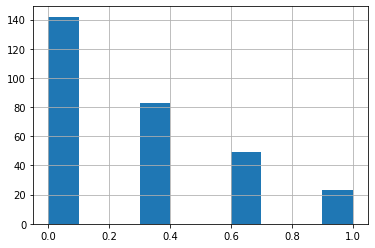

In [112]:
data_mod[0].hist()

In [114]:
data_mod['fbs'].hist()

KeyError: 'fbs'